In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob

In [2]:
df=pd.read_csv('/content/02.csv',delimiter=";",index_col=None, header=0)

In [3]:
df=df.drop(['CPU cores','Disk size [GB]','CPU capacity provisioned [MHZ]','Network received throughput [KB/s]','Network transmitted throughput [KB/s]','CPU usage [MHZ]','Memory capacity provisioned [KB]','Memory usage [KB]','Memory usage [%]','Disk read throughput [KB/s]','Disk write throughput [KB/s]'],axis=1)

In [4]:
df['Datetime'] = pd.to_datetime(df['Timestamp'], format='%d.%m.%Y %H:%M:%S')
df=df.drop(['Timestamp'],axis=1)

In [5]:
df.head()

,CPU usage [%],Datetime
0,"2,5",2015-11-05 00:00:00
1,"2,71",2015-11-05 00:05:00
2,"2,48",2015-11-05 00:10:00
3,"2,62",2015-11-05 00:15:00
4,"2,44",2015-11-05 00:20:00


In [6]:
df['CPU usage [%]'] = df['CPU usage [%]'].str.replace(',', '.').astype(float)
# df['Memory usage [%]'] = df['Memory usage [%]'].str.replace(',', '.').astype(float)
df.head()

,CPU usage [%],Datetime
0,2.50,2015-11-05 00:00:00
1,2.71,2015-11-05 00:05:00
2,2.48,2015-11-05 00:10:00
3,2.62,2015-11-05 00:15:00
4,2.44,2015-11-05 00:20:00


In [7]:
df['CPU_10_min_before'] = df['CPU usage [%]'].shift(1)
df['CPU_20_min_before'] = df['CPU usage [%]'].shift(2)
df['CPU_30_min_before'] = df['CPU usage [%]'].shift(3)
df['hour']=df['Datetime'].dt.hour
df['dayofweek']=df['Datetime'].dt.dayofweek
df['dayodyear']=df['Datetime'].dt.dayofyear
df=df.drop(['Datetime'],axis=1)
df=df.dropna()
df.head()

,CPU usage [%],CPU_10_min_before,CPU_20_min_before,CPU_30_min_before,hour,dayofweek,dayodyear
3,2.62,2.48,2.71,2.50,0,3,309
4,2.44,2.62,2.48,2.71,0,3,309
5,2.45,2.44,2.62,2.48,0,3,309
6,2.61,2.45,2.44,2.62,0,3,309
7,2.42,2.61,2.45,2.44,0,3,309


In [8]:
from sklearn.preprocessing import MinMaxScaler

In [9]:
scaler = MinMaxScaler()
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [10]:
train_size = int(len(df) * 0.8)
train_df = df[:train_size]
test_df = df[train_size:]
X_train=train_df.drop(columns=['CPU usage [%]'])
y_train=train_df['CPU usage [%]']
X_test=test_df.drop(columns=['CPU usage [%]'])
y_test=test_df['CPU usage [%]']
# test_df.head()

In [11]:
X_train.head()


,CPU_10_min_before,CPU_20_min_before,CPU_30_min_before,hour,dayofweek,dayodyear
3,0.004796,0.007144,0.005001,0,3,309
4,0.006225,0.004796,0.007144,0,3,309
5,0.004388,0.006225,0.004796,0,3,309
6,0.004490,0.004388,0.006225,0,3,309
7,0.006123,0.004490,0.004388,0,3,309


In [12]:
import xgboost as xgb

In [13]:
reg=xgb.XGBRegressor(n_estimators=1000,early_stopping_round=50 )

In [14]:
reg.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_test,y_test)],
       verbose=True)
# y_pred=rfc.predict(X_test)

[0]	validation_0-rmse:0.07157	validation_1-rmse:0.31622
[1]	validation_0-rmse:0.05133	validation_1-rmse:0.31581


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [06:16:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "early_stopping_round" } are not used.

  warnings.warn(smsg, UserWarning)


[2]	validation_0-rmse:0.03731	validation_1-rmse:0.23751
[3]	validation_0-rmse:0.02731	validation_1-rmse:0.23728
[4]	validation_0-rmse:0.02039	validation_1-rmse:0.23711
[5]	validation_0-rmse:0.01590	validation_1-rmse:0.20805
[6]	validation_0-rmse:0.01270	validation_1-rmse:0.21758
[7]	validation_0-rmse:0.01061	validation_1-rmse:0.19566
[8]	validation_0-rmse:0.00926	validation_1-rmse:0.18039
[9]	validation_0-rmse:0.00845	validation_1-rmse:0.18231
[10]	validation_0-rmse:0.00801	validation_1-rmse:0.18384
[11]	validation_0-rmse:0.00770	validation_1-rmse:0.18533
[12]	validation_0-rmse:0.00749	validation_1-rmse:0.17926
[13]	validation_0-rmse:0.00730	validation_1-rmse:0.17441
[14]	validation_0-rmse:0.00723	validation_1-rmse:0.17678
[15]	validation_0-rmse:0.00715	validation_1-rmse:0.17972
[16]	validation_0-rmse:0.00704	validation_1-rmse:0.18222
[17]	validation_0-rmse:0.00701	validation_1-rmse:0.18434
[18]	validation_0-rmse:0.00695	validation_1-rmse:0.18528
[19]	validation_0-rmse:0.00690	validati

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_round=50,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=1000,
             n_jobs=None, num_parallel_tree=None, ...)

In [15]:
y_pred=reg.predict(X_test)

In [16]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [17]:
r2 = r2_score(y_test, y_pred)

mae = mean_absolute_error(y_test, y_pred)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error
rmse = np.sqrt(mse)

# Print the metrics
print(f"R-squared: {r2:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"Mean Squared Error: {mse:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")

R-squared: 0.4836
Mean Absolute Error: 0.1130
Mean Squared Error: 0.0351
Root Mean Squared Error: 0.1874


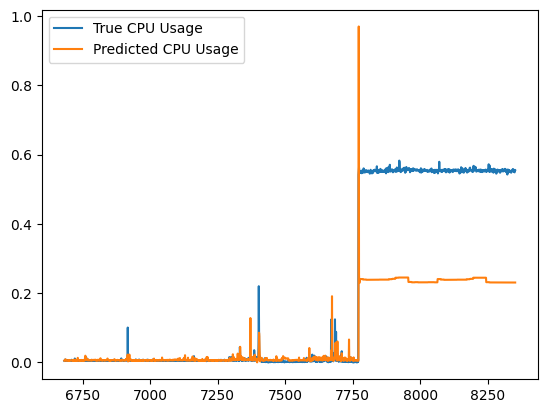

In [18]:
plt.plot(y_test.index, y_test, label='True CPU Usage')
plt.plot(y_test.index, y_pred, label='Predicted CPU Usage')
plt.legend()
plt.show()

In [19]:
from sklearn.ensemble import RandomForestRegressor

In [20]:

# Instantiate the RandomForestRegressor
rf = RandomForestRegressor(n_estimators=1000)

# Fit the model
rf.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf.predict(X_test)

# Evaluate the model
r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)

print(f"Random Forest - R-squared: {r2_rf:.4f}")
print(f"Random Forest - Mean Absolute Error: {mae_rf:.4f}")
print(f"Random Forest - Root Mean Squared Error: {rmse_rf:.4f}")

Random Forest - R-squared: 0.9168
Random Forest - Mean Absolute Error: 0.0456
Random Forest - Root Mean Squared Error: 0.0752


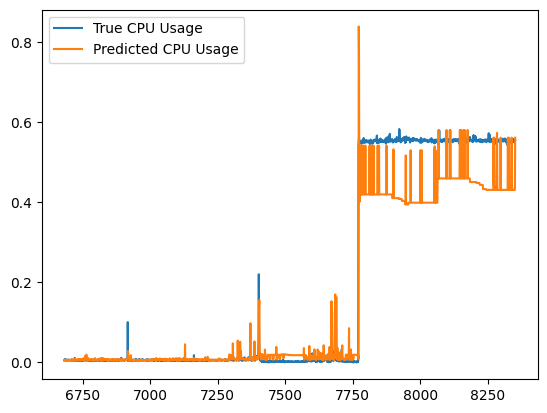

In [21]:
plt.plot(y_test.index, y_test, label='True CPU Usage')
plt.plot(y_test.index, y_pred_rf, label='Predicted CPU Usage')
plt.legend()
plt.show()

In [22]:
from sklearn.ensemble import GradientBoostingRegressor


In [23]:

# Instantiate the GradientBoostingRegressor
gbr = GradientBoostingRegressor(n_estimators=1000)

# Fit the model
gbr.fit(X_train, y_train)

# Make predictions
y_pred_gbr = gbr.predict(X_test)

# Evaluate the model
r2_gbr = r2_score(y_test, y_pred_gbr)
mae_gbr = mean_absolute_error(y_test, y_pred_gbr)
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
rmse_gbr = np.sqrt(mse_gbr)

print(f"Gradient Boosting - R-squared: {r2_gbr:.4f}")
print(f"Gradient Boosting - Mean Absolute Error: {mae_gbr:.4f}")
print(f"Gradient Boosting - Root Mean Squared Error: {rmse_gbr:.4f}")

Gradient Boosting - R-squared: 0.6135
Gradient Boosting - Mean Absolute Error: 0.0969
Gradient Boosting - Root Mean Squared Error: 0.1621


In [24]:
# Evaluate the model
r2_gbr = r2_score(y_test, y_pred_gbr)
mae_gbr = mean_absolute_error(y_test, y_pred_gbr)
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
rmse_gbr = np.sqrt(mse_gbr)

print(f"Gradient Boosting - R-squared: {r2_gbr:.4f}")
print(f"Gradient Boosting - Mean Absolute Error: {mae_gbr:.4f}")
print(f"Gradient Boosting - Root Mean Squared Error: {rmse_gbr:.4f}")

Gradient Boosting - R-squared: 0.6135
Gradient Boosting - Mean Absolute Error: 0.0969
Gradient Boosting - Root Mean Squared Error: 0.1621


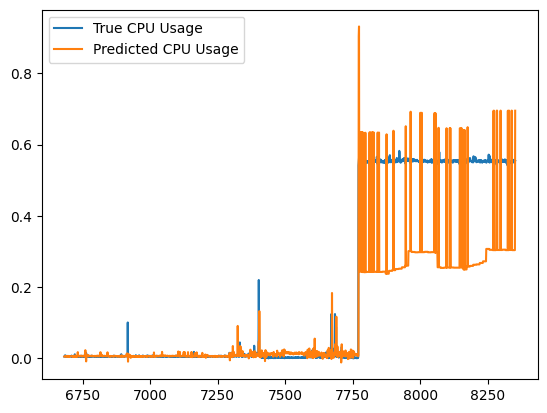

In [25]:
plt.plot(y_test.index, y_test, label='True CPU Usage')
plt.plot(y_test.index, y_pred_gbr, label='Predicted CPU Usage')
plt.legend()
plt.show()

In [26]:
  from sklearn.neighbors import KNeighborsRegressor

In [27]:
knn = KNeighborsRegressor(n_neighbors=5)  # You can tune the number of neighbors

# Fit the model
knn.fit(X_train, y_train)

# Make predictions
y_pred_knn = knn.predict(X_test)

In [28]:
r2_knn = r2_score(y_test, y_pred_knn)
mae_knn = mean_absolute_error(y_test, y_pred_knn)
mse_knn = mean_squared_error(y_test, y_pred_knn)
rmse_knn = np.sqrt(mse_knn)

print(f"KNN - R-squared: {r2_knn:.4f}")
print(f"KNN - Mean Absolute Error: {mae_knn:.4f}")
print(f"KNN - Root Mean Squared Error: {rmse_knn:.4f}")

KNN - R-squared: -0.5246
KNN - Mean Absolute Error: 0.1921
KNN - Root Mean Squared Error: 0.3220


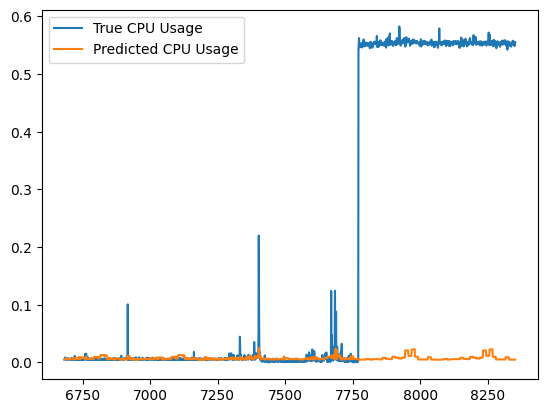

In [29]:
plt.plot(y_test.index, y_test, label='True CPU Usage')
plt.plot(y_test.index, y_pred_knn, label='Predicted CPU Usage')
plt.legend()
plt.show()

In [30]:

import lightgbm as lgb

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [31]:
lgb_reg = lgb.LGBMRegressor(n_estimators=1000)

# Fit the model
lgb_reg.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)])

# Make predictions
y_pred_lgb = lgb_reg.predict(X_test)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001173 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 539
[LightGBM] [Info] Number of data points in the train set: 6679, number of used features: 6
[LightGBM] [Info] Start training from score 0.016976


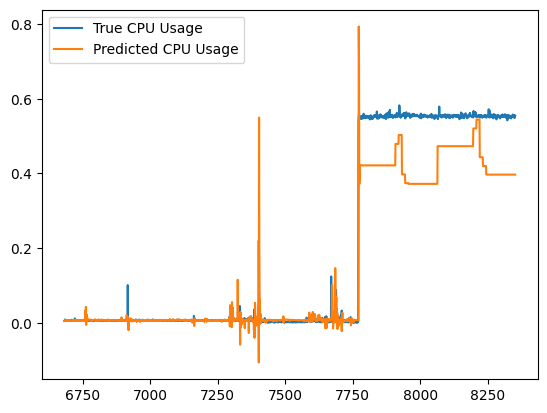

In [32]:
plt.plot(y_test.index, y_test, label='True CPU Usage')
plt.plot(y_test.index, y_pred_lgb, label='Predicted CPU Usage')
plt.legend()
plt.show()

---------------------------------------------------------------------------------------


In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import VotingRegressor, StackingRegressor
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from lightgbm import LGBMRegressor
from sklearn.neighbors import KNeighborsRegressor


# Initialize individual models
xgb_model = XGBRegressor(n_estimators=1000)
rf_model = RandomForestRegressor(n_estimators=1000)
gbr_model = GradientBoostingRegressor(n_estimators=1000)
knn_model = KNeighborsRegressor(n_neighbors=5)
lgb_model = LGBMRegressor(n_estimators=1000)




[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000786 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 539
[LightGBM] [Info] Number of data points in the train set: 6679, number of used features: 6
[LightGBM] [Info] Start training from score 0.016976
Voting Regressor - R-squared: 0.6380
Voting Regressor - Mean Absolute Error: 0.0941
Voting Regressor - Root Mean Squared Error: 0.1569


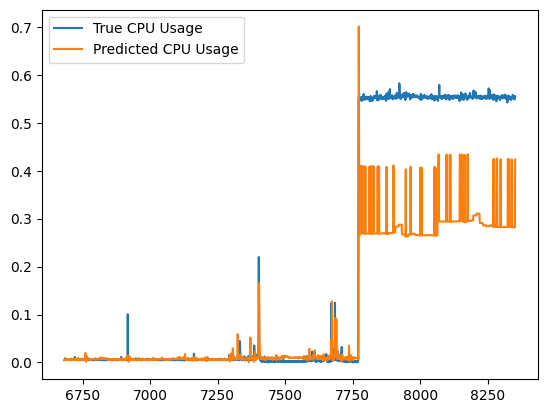

In [44]:
from sklearn.ensemble import VotingRegressor, StackingRegressor
# Create the voting regressor
voting_reg = VotingRegressor(estimators=[
    ('xgb', xgb_model),
    ('rf', rf_model),
    ('gbr', gbr_model),
    ('knn', knn_model),
    ('lgb', lgb_model)
])

# Train the voting regressor
voting_reg.fit(X_train, y_train)

# Make predictions with the voting regressor
y_pred_voting = voting_reg.predict(X_test)

# Evaluate the voting model
r2_voting = r2_score(y_test, y_pred_voting)
mae_voting = mean_absolute_error(y_test, y_pred_voting)
rmse_voting = np.sqrt(mean_squared_error(y_test, y_pred_voting))

print(f"Voting Regressor - R-squared: {r2_voting:.4f}")
print(f"Voting Regressor - Mean Absolute Error: {mae_voting:.4f}")
print(f"Voting Regressor - Root Mean Squared Error: {rmse_voting:.4f}")

plt.plot(y_test.index, y_test, label='True CPU Usage')
plt.plot(y_test.index, y_pred_voting, label='Predicted CPU Usage')
plt.legend()
plt.show()


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000158 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 539
[LightGBM] [Info] Number of data points in the train set: 6679, number of used features: 6
[LightGBM] [Info] Start training from score 0.016976
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000134 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 520
[LightGBM] [Info] Number of data points in the train set: 5343, number of used features: 6
[LightGBM] [Info] Start training from score 0.019831
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000565 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 523

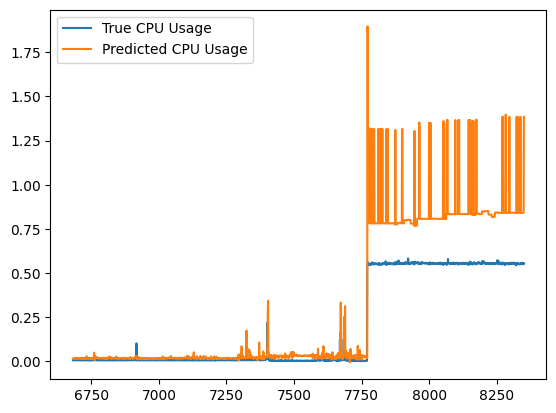

In [45]:
# Create the stacking regressor
stacking_reg = StackingRegressor(
    estimators=[
        ('xgb', xgb_model),
        ('rf', rf_model),
        ('gbr', gbr_model),
        ('knn', knn_model),
        ('lgb', lgb_model)
    ],
    final_estimator=Ridge()  # The meta-model (you can use any other regressor)
)

# Train the stacking regressor
stacking_reg.fit(X_train, y_train)

# Make predictions with the stacking regressor
y_pred_stacking = stacking_reg.predict(X_test)

# Evaluate the stacking model
r2_stacking = r2_score(y_test, y_pred_stacking)
mae_stacking = mean_absolute_error(y_test, y_pred_stacking)
rmse_stacking = np.sqrt(mean_squared_error(y_test, y_pred_stacking))

print(f"Stacking Regressor - R-squared: {r2_stacking:.4f}")
print(f"Stacking Regressor - Mean Absolute Error: {mae_stacking:.4f}")
print(f"Stacking Regressor - Root Mean Squared Error: {rmse_stacking:.4f}")

plt.plot(y_test.index, y_test, label='True CPU Usage')
plt.plot(y_test.index, y_pred_stacking, label='Predicted CPU Usage')
plt.legend()
plt.show()


Blending

In [53]:
from sklearn.model_selection import train_test_split

# Split the training data into two parts for blending
X_blend_train, X_blend_meta, y_blend_train, y_blend_meta = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


In [54]:
# Train the base models on X_blend_train
xgb_model = XGBRegressor(n_estimators=1000)
rf_model = RandomForestRegressor(n_estimators=1000)
gbr_model = GradientBoostingRegressor(n_estimators=1000)
knn_model = KNeighborsRegressor(n_neighbors=5)
lgb_model = LGBMRegressor(n_estimators=1000)

xgb_model.fit(X_blend_train, y_blend_train)
rf_model.fit(X_blend_train, y_blend_train)
gbr_model.fit(X_blend_train, y_blend_train)
knn_model.fit(X_blend_train, y_blend_train)
lgb_model.fit(X_blend_train, y_blend_train)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000357 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 503
[LightGBM] [Info] Number of data points in the train set: 5343, number of used features: 6
[LightGBM] [Info] Start training from score 0.016259


LGBMRegressor(n_estimators=1000)

In [55]:
# Generate meta-features (predictions) for the meta-model using X_blend_meta
meta_features = np.column_stack([
    xgb_model.predict(X_blend_meta),
    rf_model.predict(X_blend_meta),
    gbr_model.predict(X_blend_meta),
    knn_model.predict(X_blend_meta),
    lgb_model.predict(X_blend_meta)
])


In [56]:
from sklearn.linear_model import Ridge

# Train the meta-model on the meta-features
meta_model = Ridge()
meta_model.fit(meta_features, y_blend_meta)


Ridge()

In [57]:
# Generate base model predictions on the test set
meta_features_test = np.column_stack([
    xgb_model.predict(X_test),
    rf_model.predict(X_test),
    gbr_model.predict(X_test),
    knn_model.predict(X_test),
    lgb_model.predict(X_test)
])

# Use the meta-model to make final predictions on the test set
y_pred_blending = meta_model.predict(meta_features_test)


Blending - R-squared: 0.1341
Blending - Mean Absolute Error: 0.1459
Blending - Root Mean Squared Error: 0.2427


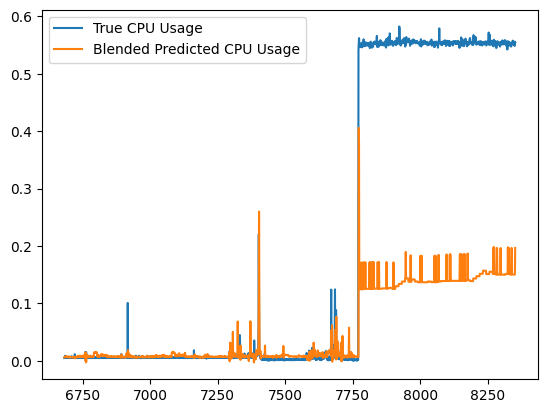

In [58]:
# Evaluate the blending model
r2_blending = r2_score(y_test, y_pred_blending)
mae_blending = mean_absolute_error(y_test, y_pred_blending)
rmse_blending = np.sqrt(mean_squared_error(y_test, y_pred_blending))

print(f"Blending - R-squared: {r2_blending:.4f}")
print(f"Blending - Mean Absolute Error: {mae_blending:.4f}")
print(f"Blending - Root Mean Squared Error: {rmse_blending:.4f}")

plt.plot(y_test.index, y_test, label='True CPU Usage')
plt.plot(y_test.index, y_pred_blending, label='Blended Predicted CPU Usage')
plt.legend()
plt.show()
